1. https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/
2. !pip install konlpy
3. !pip install nltk

In [1]:
# !pip install --upgrade pip
!pip install konlpy # 한국어 토크나이저
!pip install nltk # 영어 토크나이저

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 35.9 MB/s eta 0:00:00


In [1]:
# 한국어 폰트 다운로드
# 런타임 -->  세션 다시시작 필요

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,514 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

## Corpus

In [3]:
from konlpy.corpus import kolaw

kolaw.fileids()
# kobill.fileids()

law = kolaw.open(kolaw.fileids()[0]).read()

In [7]:
print(law[:1000])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.
  제8조 ① 정당의 설립은 자유이며, 복수정당제

In [8]:
# 어절의 수 중복허용
len(law.split()), len(law.splitlines()), law.splitlines()[:4] # enter 단위

(4178,
 356,
 ['대한민국헌법',
  '',
  '유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.',
  ''])

In [11]:
law.splitlines()[15] #\n

'  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.'

In [12]:
# 가 나 다 라 마 바 ,,,, 힣
# 0  4  2  6             3
# 0  1  2  3  4   ...... 90

from konlpy.tag import Kkma
from collections import Counter
import re # 정규표현식 -> 텍스트 정제

# Kkma 객체 생성
kkma = Kkma()

# 예시 corpus
corpus = law

# 텍스트 전처리: 특수문자 제거 "^ :아닌것"

corpus = re.sub(r'[^가-힣\s]', '', corpus) # 가에서 힣 사이에 있지 않은것은 삭제

# 형태소 분석
morphs = kkma.pos(corpus)


In [14]:
print(corpus[:1000]) # 특수문자, 숫자가 제거

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 민주이념을 계승하고 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의인도와 동포애로써 민족의 단결을 공고히 하고 모든 사회적 폐습과 불의를 타파하며 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치경제사회문화의 모든 영역에 있어서 각인의 기회를 균등히 하고 능력을 최고도로 발휘하게 하며 자유와 권리에 따르는 책임과 의무를 완수하게 하여 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 년 월 일에 제정되고 차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다

       제장 총강
  제조  대한민국은 민주공화국이다
대한민국의 주권은 국민에게 있고 모든 권력은 국민으로부터 나온다
  제조  대한민국의 국민이 되는 요건은 법률로 정한다
국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다
  제조 대한민국의 영토는 한반도와 그 부속도서로 한다
  제조 대한민국은 통일을 지향하며 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다
  제조  대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다
국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며 그 정치적 중립성은 준수된다
  제조  헌법에 의하여 체결공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다
외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다
  제조  공무원은 국민전체에 대한 봉사자이며 국민에 대하여 책임을 진다
공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다
  제조  정당의 설립은 자유이며 복수정당제는 보장된다
정당은 그 목적조직과 활동이 민주적이어야 하며 국민의 정치적 의사형성에 참여하는데 필요한 조직을 가져야

In [15]:
print(morphs[0:30])

[('대한민국', 'NNG'), ('헌법', 'NNG'), ('유구', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('역사', 'NNG'), ('와', 'JC'), ('전통', 'NNG'), ('에', 'JKM'), ('빛나', 'VV'), ('는', 'ETD'), ('우리', 'NNM'), ('대하', 'VV'), ('ㄴ', 'ETD'), ('국민', 'NNG'), ('은', 'JX'), ('운동', 'NNG'), ('으로', 'JKM'), ('건립', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), ('대한민국', 'NNG'), ('임시', 'NNG'), ('정부', 'NNG'), ('의', 'JKG'), ('법통', 'NNG'), ('과', 'JC'), ('불의', 'NNG'), ('에', 'JKM'), ('항거', 'NNG')]


In [17]:

# 불용어 리스트
stopwords = set("""
또는 그 및 대한민국 제조 제장 수 때 바
""".split())

# 명사, 동사, 형용사 필터링
nouns = [word for word, pos in morphs if pos.startswith('N') and word not in stopwords]
print("명사 예시 10개 : ",nouns[:10])


# 빈도수 계산
noun_counts = Counter(nouns)

# 상위 10개 출력
print("가장 많이 나온 명사:")
for word, freq in noun_counts.most_common(10):
    print(f"{word}: {freq}")


명사 예시 10개 :  ['헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '임시', '정부']
가장 많이 나온 명사:
법률: 120
대통령: 84
국가: 73
헌법: 69
국민: 69
국회: 56
회의: 41
위원: 32
필요: 31
기타: 26


In [18]:
from konlpy.tag import Kkma
from collections import Counter
import matplotlib.pyplot as plt
import re


# 빈도수 계산
noun_counts = Counter(nouns)

# 상위 10개 추출
top_nouns = noun_counts.most_common(10)

# 그래프 그리기
def plot_top_words(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(3, 2))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.show()

가장 많이 나온 명사:


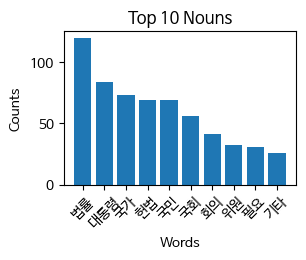

In [19]:
print("가장 많이 나온 명사:")
plot_top_words(top_nouns, 'Top 10 Nouns')


## NLTK :Sent tokenizer와 Pos tagging

In [20]:
!pip install nltk

In [21]:
import nltk
from nltk.corpus import gutenberg
from collections import Counter
import matplotlib.pyplot as plt

# 필요한 NLTK 데이터 다운로드
nltk.download('gutenberg') # 책 데이터셋
nltk.download('averaged_perceptron_tagger') # pos tagger
nltk.download('punkt') # 특수문자 기호 들어있는 ,, 데이터셋

# 예시로 사용할 텍스트
corpus = gutenberg.raw('austen-emma.txt')
print(corpus[:1000])

# 문장 토큰화
sentences = nltk.sent_tokenize(corpus)



[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [22]:
print("corpus : ", corpus[3])
print("sentence : ",sentences[3].replace("\n", " "))

corpus :  m
sentence :  Sixteen years had Miss Taylor been in Mr. Woodhouse's family, less as a governess than a friend, very fond of both daughters, but particularly of Emma.


In [23]:

# 형태소 분석 및 품사 태깅
all_nouns = []

for sentence in sentences:
    words = nltk.word_tokenize(sentence) # 단어 단위 분리
    pos_tags = nltk.pos_tag(words) # 형태소 태깅

    nouns = [word for word, pos in pos_tags if pos.startswith('NN')]
    all_nouns.extend(nouns)


In [24]:
words = nltk.word_tokenize(sentences[0])
print("Words : ", words)
print("Pos tag : ",nltk.pos_tag(words))

Words :  ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']
Pos tag :  [('[', 'NNS'), ('Emma', 'NNP'), ('by', 'IN'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), (']', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), (',', ','), ('handsome', 'NN'), (',', ','), ('clever', 'NN'), (',', ','), ('and', 'CC'), ('rich', 'JJ'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), (',', ','), ('seemed', 'VBD'), ('to', 'TO'), ('unite

Most common nouns:


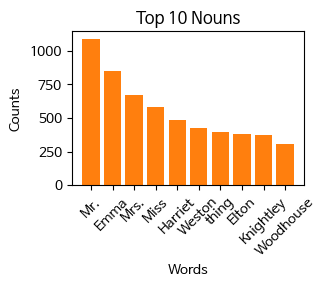

In [25]:
# 빈도수 계산
noun_counts = Counter(all_nouns)


# 상위 10개 추출
top_nouns = noun_counts.most_common(10)


# 그래프 그리기
def plot_top_words(word_counts, title, color):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(3, 2))
    plt.bar(words, counts, color=color)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.show()

print("Most common nouns:")
plot_top_words(top_nouns, 'Top 10 Nouns',  '#ff7f0e')


### 한국어 sent tokenizer 적용


In [26]:
sent_law =  nltk.sent_tokenize(law)

In [31]:
sent_law[12]

'②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.'